#  Predictive Modelling

## Linear Regression

## objective

### A straming company is focusing on the anime available in their portal and wants to identify the most important factors involved in rating an anime. As a data scientist, you are tasked with analyzing the portal's anime data and identifying the important factors by building a predictive model to predict the rating of an anime.

## Data Dictionary

#### Each record in the database provides a description of an anime. A detailed data dictionary can be found below.
#### 1. title: title of the anime
#### 2. media Type: format of publication
#### 3. eps: number of episodes (movies are considered 1 episode)
#### 4. duration: duration of an episode in minutes
#### 5. startYr: the year that airing started
#### 6. finishYr: the year that airing finished
#### 7. description: the synopsis of the plot
#### 8. contentWarn: content warning
#### 9. watched: number of users that completed it
#### 10. watching: number of users that are watching it
#### 11. rating: average user rating
#### 12. votes: number of votes that contribute to the rating
#### 13. studio_primary: studios responsible for creation
#### 14. studios_colab: whether there was a collaboration between studios for anime production
#### 15. genre: genre to which the anime belongs

# Importing Libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Dataset 

In [4]:
df = pd.read_csv('/Users/vishal/Desktop/CSV files/anime_rating_dataset.csv')

### Displaying the first few rows of data set


In [6]:
df.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


### Checking the shape of the dataset

In [8]:
df.shape

(6523, 15)

#### • The dataset contains information (15 attributes) about 6523 anime

### Checking the data types of the columns for the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


#### • There are 8 numeric (float and int type) and 7 string (object type) columns in the data
#### • The target variable is the rating of an anime, which is of float type

# Statistical summary of the dataset

In [14]:
df.describe()

,eps,duration,startYr,finishYr,watched,watching,rating,votes
count,6523.000000,6248.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6496.000000
mean,8.716235,18.396287,2005.241147,2005.575349,1347.948643,57.445654,2.962553,906.253233
std,11.002479,20.949350,12.911035,12.568169,1737.138112,76.527405,0.760486,1171.677648
min,1.000000,1.000000,1967.000000,1970.000000,5.000000,0.000000,1.111000,10.000000
25%,1.000000,5.000000,2000.000000,2000.000000,56.000000,2.000000,2.371000,34.000000
50%,1.000000,7.000000,2010.000000,2010.000000,349.000000,13.000000,2.944000,227.500000
75%,12.000000,25.000000,2015.000000,2015.000000,2252.500000,98.000000,3.568000,1567.750000
max,34.000000,67.000000,2020.000000,2020.000000,4649.000000,199.000000,4.702000,3100.000000


#### • We can see that the anime ratings vary between 1.1 and 4.7, which suggests that the anime were rated on a scale of 0-5
#### • The general rating of anime is 2.96
#### • TV is the most occurring type of media.
#### • The number of views for the anime in the data varies from 5 to ~5000
#### • The number of votes received by an anime in the data varies from 10 to 3100

# Checking for duplicate values

In [17]:
df.duplicated().sum()

0

#### • There are no duplicate values in the data

# Checking for missing values

In [20]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

#### • There are missing values in many columns.

# Data Preprocessing 



In [23]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

#### Let's fix the missing values in the data.
#### • For the variable mediaType, we will impute the missing values with 'Other' as the exact values for that category are not known
#### • For the variables duration and votes, we will impute the missing values in each column with the median grouped by genre and mediaType as both the columns have skewed distributions

In [25]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy ()
df1.mediaType.fillna("Other", inplace=True)
df1["duration"] = df1["duration"].fillna(
 value=df1.groupby(["genre", "mediaType"]) ["duration"].transform ("median")
)

df1["votes"] = df1["votes"].fillna(
value=df1.groupby(["genre", "mediaType"]) ["votes"].transform("median")
)


In [26]:
df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

#### • We will impute the remaining missing values in the duration column with the median grouped by genre

In [28]:
df1["duration"] = df1["duration"].fillna(
value=df1.groupby(["genre"]) ["duration"]. transform("median")
)


In [29]:
df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

#### • All the missing values have been treated.

# Feature Engineering



#### • Let's create a new feature years_running by taking the difference between finishYr and startyr columns
#### • We will drop the original columns once the new feature is created as the year values themselves are not numerical in nature

In [33]:
df1["years_running"] = df1["finishYr"] - df1["startYr"]
df1.drop(["startYr"
, "finishYr"], axis=1, inplace=True)
df1. head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


# Outlier detection

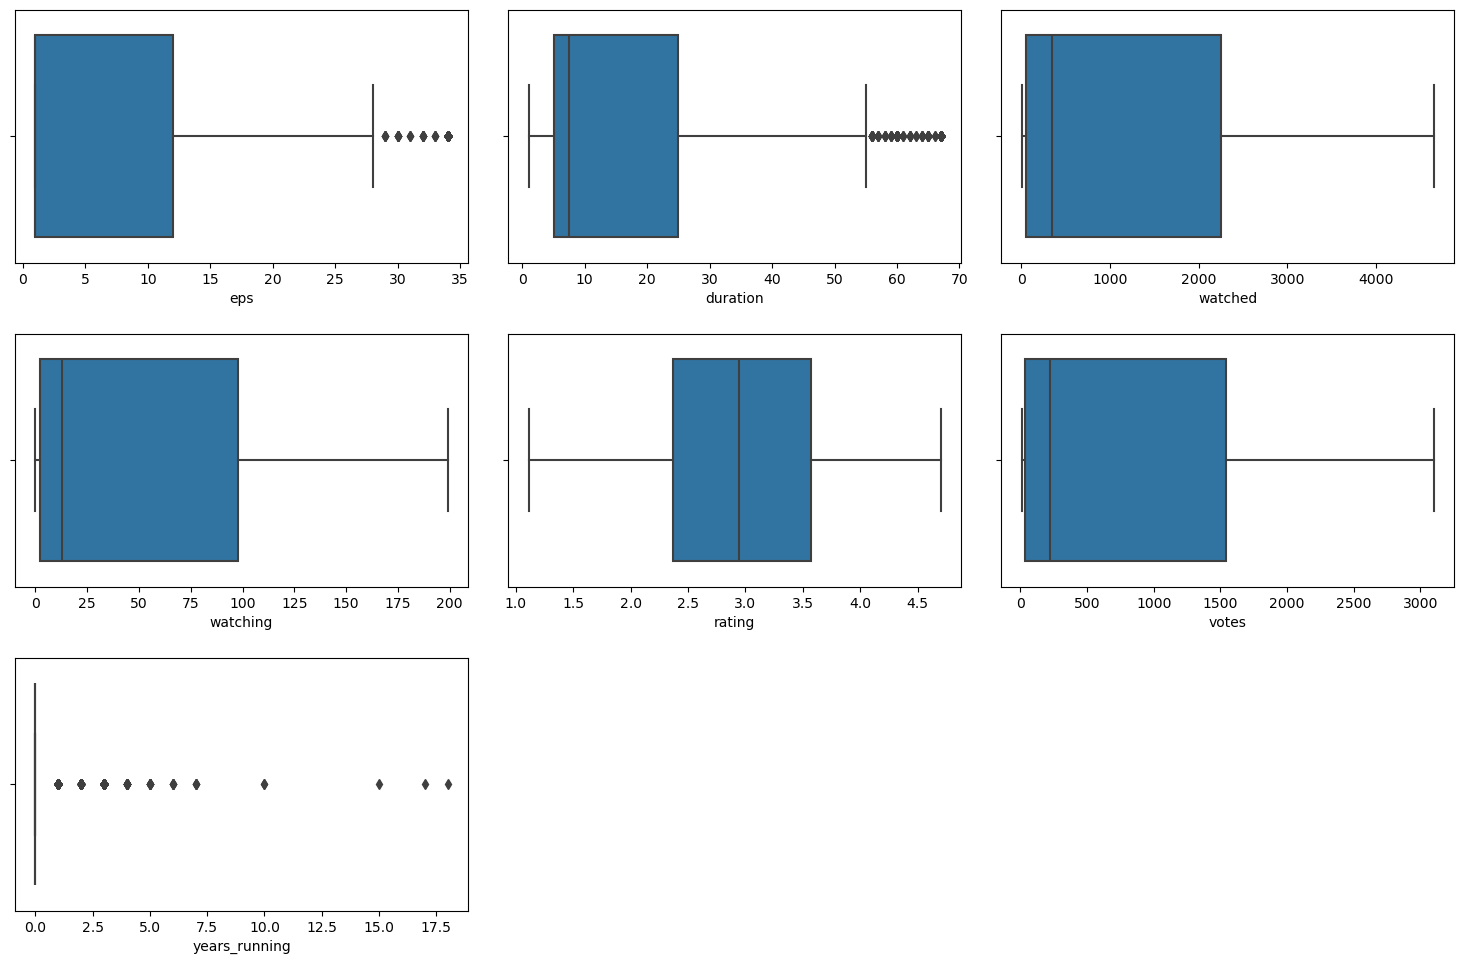

In [35]:
# outlier detection using boxplot
num_cols = df1. select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))
for i, variable in enumerate(num_cols) :
 plt.subplot (3, 3, i + 1)
 sns.boxplot(data=df1, x=variable)
 plt.tight_layout (pad=2)
plt.show()

#### • There are quite a few outliers in the data
#### • However, we will not treat them as they are proper values
#### • We will drop the columns title and description as they contain a lot of text and too many unique values, and can be excluded from modeling

In [37]:
df1.drop(["title", "description"], axis=1, inplace=True)

In [38]:
df1.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


# Data Preparation for modeling

#### • We want to predict the rating of an anime
#### • Before we proceed to build a model, we'll have to encode categorical features
#### • We'll split the data into train and test to be able to evaluate the model that we build on the train data
#### • We will build a Linear Regression model using the train data and then check it's performance

In [41]:
df2=df1.copy()

In [42]:
# defining X and y variables
X = df2.drop(["rating"], axis=1)
y = df2["rating"]

# let's add the intercept to data
X = sm.add_constant(X)  # Corrected this line

# creating dummy variables
X = pd.get_dummies(
 X,
 columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
 drop_first=True
)
X.head()


,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
# converting the input attributes into float type for modeling
x = X.astype(float)
X. head ()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [44]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])


Number of rows in train data = 4566
Number of rows in test data = 1957


# Model Building - Linear Regression

In [57]:
print(X_train.dtypes)
print(X_test.dtypes)


const                               float64
eps                                   int64
duration                            float64
watched                               int64
watching                              int64
votes                               float64
years_running                         int64
mediaType_Movie                        bool
mediaType_Music Video                  bool
mediaType_OVA                          bool
mediaType_Other                        bool
mediaType_TV                           bool
mediaType_TV Special                   bool
mediaType_Web                          bool
contentWarn_Yes                        bool
studio_primary_J.C. Staff              bool
studio_primary_MADHOUSE                bool
studio_primary_OLM                     bool
studio_primary_Others                  bool
studio_primary_Production I.G          bool
studio_primary_Studio Deen             bool
studio_primary_Studio Pierrot          bool
studio_primary_Sunrise          

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert all boolean columns to integers
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes(include=['bool']).columns})

# Ensure all columns are numeric
print(X_train.dtypes)
print(X_test.dtypes)

# Fit the model again
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())


const                               float64
eps                                   int64
duration                            float64
watched                               int64
watching                              int64
votes                               float64
years_running                         int64
mediaType_Movie                       int64
mediaType_Music Video                 int64
mediaType_OVA                         int64
mediaType_Other                       int64
mediaType_TV                          int64
mediaType_TV Special                  int64
mediaType_Web                         int64
contentWarn_Yes                       int64
studio_primary_J.C. Staff             int64
studio_primary_MADHOUSE               int64
studio_primary_OLM                    int64
studio_primary_Others                 int64
studio_primary_Production I.G         int64
studio_primary_Studio Deen            int64
studio_primary_Studio Pierrot         int64
studio_primary_Sunrise          

# Interpreting the Regression Results

# PART - 1

#### 1. Adjusted. R-squared: It reflects the fit of the model.
#### • Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
#### • In our case, the value for adj. R-squared is 0.722, which is good.
#### 2. const coefficient: It is the Y-intercept.
#### • It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
#### • In our case, the value for const coefficient is 2.7707
#### 3. Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
#### • In our case, the coefficient of duration is 0.0123.


# Model Performance Check

#### Let's check the performance of the model using different metrics.
#### • We will be using metric functions defined in sklearn for RMSE, MAE, and R2
#### • We will define a function to calculate MAPE and adjusted R2
#### • The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
#### • We will create a function which will print out all the above metrics in one go.

In [67]:
# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)  # Compute R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # Compute RMSE
    mae = mean_absolute_error(target, pred)  # Compute MAE
    
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame({
        "RMSE": [rmse],
        "MAE": [mae],
        "R-squared": [r2]
    })
    return df_perf


In [69]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
print(olsmodel_train_perf)


Training Performance

      RMSE       MAE  R-squared
0  0.40112  0.330417   0.722387


In [71]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
print(olsmodel_test_perf)


Test Performance

       RMSE       MAE  R-squared
0  0.413096  0.340426   0.703053


#### Observations
#### • The training R? is 0.72, so the model is not underfitting
#### • The train and test RMSE and MAE are comparable, so the model is not overfitting either
#### • MAE suggests that the model can predict anime ratings within a mean error of 0.34 on the test data

# 2- Checking Linear Regression Assumptions



#### We will be checking the following Linear Regression assumptions:
#### . No Multicollinearity
#### 2. Linearity of variables
#### 3. Independence of error terms
#### 4. Normality of error terms
#### 5. No Heteroscedasticity

# TEST FOR MULTICOLLINEARITY



#### • Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.
#### • There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.
#### • Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient Bk is "inflated" by the existence of correlation among the predictor variables in the model.
#### • If VIF is 1, then there is no correlation among the kth predictor and the remaining predictor variables, and hence, the variance of Bk is not inflated at all.
#### • General Rule of thumb:
#### • If VIF is between 1 and 5, then there is low multicollinearity.
#### • If VIF is between 5 and 10, we say there is moderate multicollinearity.
#### • If VIF is exceeding 10, it shows signs of high multicollinearity.

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    
    # Calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    
    return vif

# Checking VIF
vif_df = checking_vif(X_train).sort_values('VIF', ascending=False)
print(vif_df)


                             feature         VIF
0                              const  152.488126
5                              votes   79.580182
3                            watched   68.407244
31                       genre_Other   11.591914
18             studio_primary_Others   11.131121
11                      mediaType_TV    6.998184
4                           watching    4.997799
26                   genre_Adventure    4.197895
7                    mediaType_Movie    4.062291
24     studio_primary_Toei Animation    3.983035
1                                eps    3.907746
32                     genre_Romance    3.349247
9                      mediaType_OVA    3.049100
29                       genre_Drama    2.915488
22            studio_primary_Sunrise    2.881062
2                           duration    2.752909
33                      genre_Sci Fi    2.698722
23  studio_primary_TMS Entertainment    2.530580
15         studio_primary_J.C. Staff    2.512300
8              media

#### • There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
#### • We will systematically drop numerical columns with VIF > 5
#### • We will ignore the VIF values for dummy variables and the constant (intercept)

# Remove Multicollinearity

#### To remove multicollinearity

#### 1. Drop every column one by one that has a VIF score greater than 5.
#### 2. Look at the adjusted R-squared and RMSE of all these models.
#### 3. Drop the variable that makes the least change in adjusted R-squared.
#### 4. Check the VIF scores again.
#### 5. Continue till you get all VIF scores under 5.
#### Let's define a function that will help us do this.


In [89]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity on model performance (adj. R-squared and RMSE)
    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    
    # Empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # Build OLS models by dropping one of the high VIF columns at a time
    # Store the adjusted R-squared and RMSE in the lists defined previously
    for col in high_vif_columns:
        # Defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(col)]
        
        # Create the model
        olsmodel = sm.OLS(target, train).fit()
        
        # Adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))
    
    # Creating a dataframe for the results
    temp = pd.DataFrame({
        "col": high_vif_columns,
        "Adj. R-squared after dropping col": adj_r2,
        "RMSE after dropping col": rmse
    }).sort_values(by="Adj. R-squared after dropping col", ascending=False)
    
    temp.reset_index(drop=True, inplace=True)
    
    return temp

# Example usage
col_list = ["watched", "votes"]
res = treating_multicollinearity(X_train, y_train, col_list)
print(res)


       col  Adj. R-squared after dropping col  RMSE after dropping col
0    votes                           0.716994                 0.405042
1  watched                           0.707967                 0.411451


In [91]:
col_to_drop = "votes"

# Creating new train and test sets by dropping the specified column
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping", col_to_drop)
print(vif)


VIF after dropping votes
                             feature         VIF
0                              const  152.249342
1                                eps    3.873093
2                           duration    2.752030
3                            watched    3.235392
4                           watching    4.154724
5                      years_running    1.272523
6                    mediaType_Movie    4.060078
7              mediaType_Music Video    2.408173
8                      mediaType_OVA    3.049085
9                    mediaType_Other    1.729382
10                      mediaType_TV    6.924966
11              mediaType_TV Special    1.756017
12                     mediaType_Web    2.227588
13                   contentWarn_Yes    1.125939
14         studio_primary_J.C. Staff    2.512299
15           studio_primary_MADHOUSE    2.359013
16                studio_primary_OLM    1.882550
17             studio_primary_Others   11.126123
18     studio_primary_Production I.G    2.24

#### • We have dealt with multicollinearity in the data
#### • Let's rebuild the model using the updated set of predictors variables

In [96]:
olsmod1 = sm.OLS(y_train, X_train2).fit()
print(olsmod1.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     362.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:56:23   Log-Likelihood:                -2335.7
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4533   BIC:                             4950.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Notes:
#### [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
#### [2] The condition number is large, 6.35e+04. This might indicate that there are strong multicollinearity or other numerical problems.

# Interpreting the Regression Results:

# Part 2

#### 4. std err: It reflects the level of accuracy of the coefficients.
#### • The lower it is, the higher is the level of accuracy.
#### 5. P>t|: It is p-value.
#### independent variable.
#### • For each independent feature, there is a null hypothesis and an alternate hypothesis. Here S\beta_i$ is the coefficient of the SiSth
####   • SH_O$: Independent feature is not significant (S\beta_i = O$)
####   • SH_a$: Independent feature is that it is significant (S\beta_i \neq 0$)
#### • (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
#### • A p-value of less than 0.05 is considered to be statistically significant.
#### 6. Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).
#### Observations
#### • We can see that adj. R-squared has dropped from 0.720 to 0.717, which shows that the dropped columns did not have much effect on the model
#### • As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

# Dealing with high p-value variables

#### • Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
#### • But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
#### • Instead, we will do the following:
#### • Build a model, check the p-values of the variables, and drop the column with the highest p-value
#### • Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
#### • Repeat the above two steps till there are no columns with p-value > 0.05
#### Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [106]:
# Initial list of columns
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_P_value = 1

while len(cols) > 0:
    # Defining the train set
    X_train_aux = predictors[cols]
    
    # Fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()
    
    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_P_value = max(p_values)
    
    # Name of the variable with maximum p-value
    feature_with_P_max = p_values.idxmax()
    
    if max_P_value > 0.05:
        cols.remove(feature_with_P_max)
    else:
        break

selected_features = cols
print(selected_features)


['const', 'eps', 'duration', 'watched', 'watching', 'years_running', 'mediaType_Movie', 'mediaType_Music Video', 'mediaType_OVA', 'mediaType_Other', 'mediaType_TV', 'mediaType_TV Special', 'mediaType_Web', 'contentWarn_Yes', 'studio_primary_J.C. Staff', 'studio_primary_MADHOUSE', 'studio_primary_OLM', 'studio_primary_Others', 'studio_primary_Studio Deen', 'studio_primary_Studio Pierrot', 'studio_primary_Sunrise', 'studio_primary_Toei Animation', 'genre_Adventure', 'genre_Comedy', 'genre_Drama']


In [108]:
# Using selected features to create new train and test sets
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

# Fitting the OLS model with the new training set
olsmod2 = sm.OLS(y_train, X_train3).fit()
print(olsmod2.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     482.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:04:49   Log-Likelihood:                -2340.4
No. Observations:                4566   AIC:                             4731.
Df Residuals:                    4541   BIC:                             4891.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Notes:
#### [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
#### [2] The condition number is large, 2.81e+04. This might indicate that there are strong multicollinearity or other numerical problems.

In [111]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train3, y_train)
print(olsmod2_train_perf)


Training Performance

      RMSE      MAE  R-squared
0  0.40399  0.33291     0.7184


In [113]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test3, y_test)
print(olsmod2_test_perf)


Test Performance

       RMSE       MAE  R-squared
0  0.414583  0.341345   0.700912


#### Observations
#### • Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with
#### • Now adjusted R-squared is 0.717, i.e., our model is able to explain ~72% of the variance
#### • The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.717
#### • This shows that the variables we dropped were not affecting the model
#### • RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting
#### Now we'll check the rest of the assumptions on olsmod2.
#### 2. Linearity of variables
#### 3. Independence of error terms
#### 4. Normality of error terms
#### 5. No Heteroscedasticity

# TEST FOR LINEARITY AND INDEPENDENCE

### Why the test?
#### • Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
#### • The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.
### How to check linearity and independence?
#### • Make a plot of fitted values vs residuals.
#### • If they don't follow any pattern, then we say the model is linear and residuals are independent.
#### • Otherwise, the model is showing signs of non-linearity and residuals are not independent.
### How to fix if this assumption is not followed?
#### • We can try to transform the variables and make the relationships linear.

In [119]:
# Create a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals
print(df_pred.head())


      Actual Values  Fitted Values  Residuals
5432          2.872       2.795321   0.076679
5326          2.766       2.275887   0.490113
1021          4.049       4.446845  -0.397845
836           3.153       3.176604  -0.023604
1396          2.167       2.265921  -0.098921


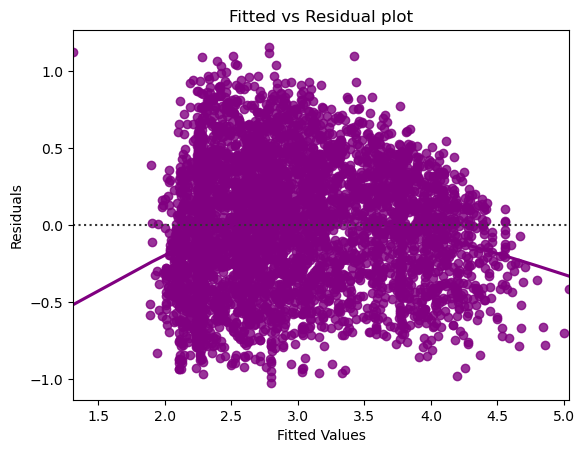

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's plot the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


#### • The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
#### • If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.
#### • We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.


# Test For Normality

#### Why the test?
#### • Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.
#### How to check normality?
#### • The shape of the histogram of residuals can give an initial idea about the normality.
#### • It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
#### • Other tests to check for normality includes the Shapiro-Wilk test.
#### • Null hypothesis: Residuals are normally distributed
#### • Alternate hypothesis: Residuals are not normally distributed
#### How to fix if this assumption is not followed?
#### • We can apply transformations like log, exponential, arcsinh, etc. as per our data.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


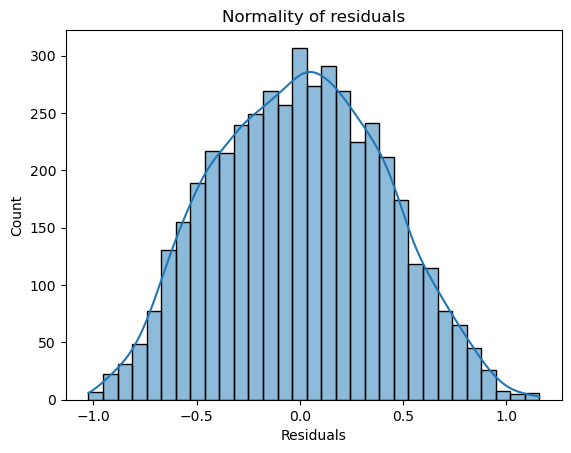

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()


#### • The histogram of residuals does have a bell shape.
#### • Let's check the Q-Q plot.

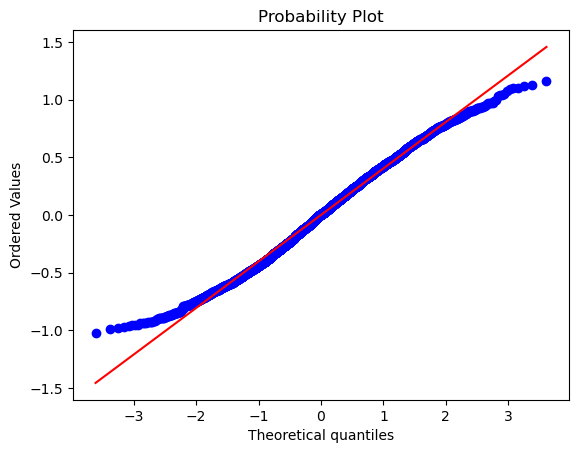

In [129]:
import pylab
import scipy.stats as stats

# Q-Q plot to check the normality of residuals
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
pylab.show()


#### • The residuals more or less follow a straight line except for the tails.
#### • Let's check the results of the Shapiro-Wilk test.

In [132]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on the residuals
shapiro_test = shapiro(df_pred["Residuals"])
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)


Shapiro-Wilk Test:
Test Statistic: 0.9934884905815125
p-value: 1.4591795924768364e-13


#### • Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
#### • Strictly speaking, the residuals are not normal.
#### • However, as an approximation, we can accept this distribution as close to being normal.
#### • So, the assumption is satisfied.

# TEST FOR HOMOSCEDASTICITY  

#### • Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.
#### • Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.
#### Why the test?
#### • The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.
#### How to check for homoscedasticity?
#### • The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
#### • The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
#### • Null hypothesis: Residuals are homoscedastic
#### • Alternate hypothesis: Residuals have heteroscedasticity
#### How to fix if this assumption is not followed?
#### • Heteroscedasticity can be fixed by adding other important features or making transformations.

In [139]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Define the names for the test statistics
names = ["F statistic", "p-value"]

# Perform the Goldfeld-Quandt test
test = sms.het_goldfeldquandt(y_train, X_train3)

# Print the results
results = dict(lzip(names, test))
print(results)


{'F statistic': 1.0484582413449557, 'p-value': 0.1304796784544968}


#### Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

# Predictions on test data



#### Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [144]:
# Predictions on the test set
pred = olsmod2.predict(X_test3)

# Creating a DataFrame with actual and predicted values
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})

# Sampling 10 random rows from the DataFrame
print(df_pred_test.sample(10, random_state=1))


      Actual  Predicted
2023   2.039   2.262980
4543   3.236   3.784680
1914   2.314   2.323405
4856   2.457   2.176779
4405   2.322   2.331494
5755   4.344   3.928340
2341   2.858   2.279015
1637   3.976   3.879616
5730   3.728   3.588967
1385   2.692   2.420355


# Final Model

#### Let's recreate the final model and print it's summary to gain insights.

In [147]:
# Final training and testing sets
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

# Fit the final OLS model
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     482.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:21:21   Log-Likelihood:                -2340.4
No. Observations:                4566   AIC:                             4731.
Df Residuals:                    4541   BIC:                             4891.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         